In [11]:
import pandas as pd

df = pd.read_csv('data/wines_SPA.csv')

print(df.head())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [3]:
len(df)

7500

In [5]:
print(df.shape)
print(df.describe())

(7500, 11)
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000


In [ ]:
df_sorted = df.sort_values(by=df.columns.tolist())

print(df_sorted[df_sorted.duplicated(keep=False)])

                  winery        wine  year  rating  num_reviews country  \
2042              Artadi  Valdegines  2016     4.2          398  Espana   
2067              Artadi  Valdegines  2016     4.2          398  Espana   
2092              Artadi  Valdegines  2016     4.2          398  Espana   
2117              Artadi  Valdegines  2016     4.2          398  Espana   
2142              Artadi  Valdegines  2016     4.2          398  Espana   
...                  ...         ...   ...     ...          ...     ...   
5124  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5524  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5574  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5874  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5999  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   

              region  price         type  body  acidity  
2042  Vino de Espana  48.96  Tempranillo 

In [6]:
df = df.drop_duplicates()
print(df.shape)


(2048, 11)


In [ ]:
df.isnull().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

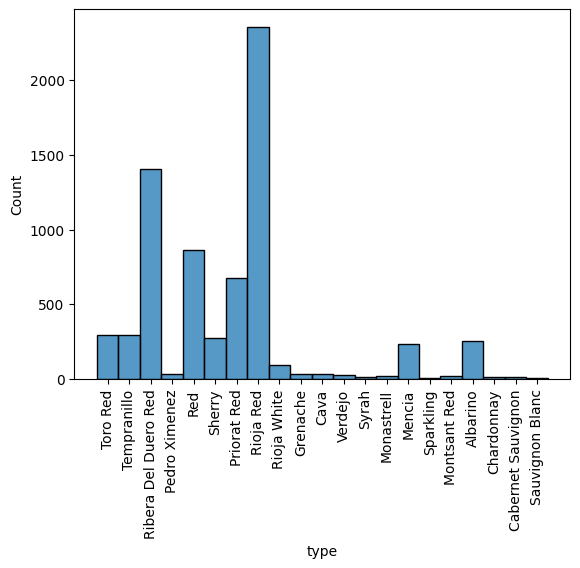

In [13]:
# checking the imputability by looking at the distribution

import matplotlib.pyplot as plt
import seaborn as sns
df['type_missing'] = df['type'].fillna('Missing')
sns.histplot(df['type'])
plt.xticks(rotation=90)
plt.show()

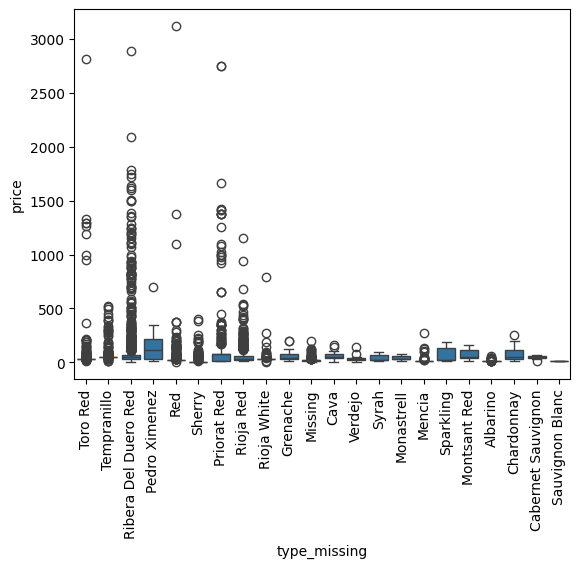

In [16]:
sns.boxplot(x='type_missing', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_missing_body = df[df['body'].isnull()]
print(df_missing_body)

                      winery                                wine  year  \
120            Finca Moncloa                    Tintilla de Rota  2016   
147          Rafael Palacios           Sorte O Soro Val do Bibei  2019   
156     Gutierrez de la Vega  Recondita Armonia Monastrell Dulce  1987   
254      Costers del Siurana                      Dolc de L'Obac  2006   
288   Francisco Garcia Perez          Adega do Moucho Treixadura  2017   
...                      ...                                 ...   ...   
2021             Mustiguillo                     Finca Terrerazo  2017   
2022             Matarromera                        Gran Reserva  2011   
2023                Sei Solo                            Preludio  2016   
2024      Vinedos de Paganos                          El Puntido  2005   
6100       Remirez de Ganuza                        Rioja Blanco  2017   

      rating  num_reviews country            region      price  \
120      4.7           92  Espana            

check for year that all values are actually years

In [ ]:
print(df['year'].dtype)

object


they are not (object), so I force all non-numerical values to become NaN

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [ ]:
# check again
print(df['year'].dtype)
df.isnull().sum()

float64


winery           0
wine             0
year            72
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Probably should repeat that for all numerical columns

In [ ]:
print(f"Data Type for year: {df['year'].dtype}")
print(f"Data Type for rating: {df['rating'].dtype}")
print(f"Data Type for num_reviews: {df['num_reviews'].dtype}")
print(f"Data Type for price: {df['price'].dtype}")
print(f"Data Type for acidity: {df['acidity'].dtype}")

Data Type for year: float64
Data Type for rating: float64
Data Type for num_reviews: int64
Data Type for price: float64
Data Type for acidity: float64


ok looks good. I can't change year to int64 because of the existing NaNs.

Check the data with reagrds to type, body and acidity
1. is there a relationship between body and acidity missing?
2. what about type and year?

In [ ]:
# Boolean mask: both missing
both_missing = df['body'].isna() & df['acidity'].isna()

# Just feature_1 missing
only_f1_missing = df['body'].isna() & df['acidity'].notna()

# Just feature_2 missing
only_f2_missing = df['acidity'].isna() & df['body'].notna()

# Summary
print(f"Both missing: {both_missing.sum()}")
print(f"Only body missing: {only_f1_missing.sum()}")
print(f"Only acidity missing: {only_f2_missing.sum()}")

Both missing: 271
Only body missing: 0
Only acidity missing: 0


In [ ]:
# Boolean mask: both missing
both_missing = df['body'].isna() & df['type'].isna()

# Just feature_1 missing
only_f1_missing = df['body'].isna() & df['type'].notna()

# Just feature_2 missing
only_f2_missing = df['type'].isna() & df['body'].notna()

# Summary
print(f"Both missing: {both_missing.sum()}")
print(f"Only body missing: {only_f1_missing.sum()}")
print(f"Only type missing: {only_f2_missing.sum()}")

Both missing: 106
Only body missing: 165
Only type missing: 0


In [ ]:
# Boolean mask: both missing
both_missing = df['body'].isna() & df['year'].isna()

# Just feature_1 missing
only_f1_missing = df['body'].isna() & df['year'].notna()

# Just feature_2 missing
only_f2_missing = df['year'].isna() & df['body'].notna()

# Summary
print(f"Both missing: {both_missing.sum()}")
print(f"Only body missing: {only_f1_missing.sum()}")
print(f"Only year missing: {only_f2_missing.sum()}")

Both missing: 9
Only body missing: 262
Only year missing: 63


No overlap with year. Missing years have a different reason. 

Now, it could be that there are more duplicates, if the only reason is a missing value.
I check for duplicates across all columns except the ones with missing values year, type, body, acidity)

In [ ]:
# all features: 'winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region', 'price', 'type', 'body', 'acidity'
df_sorted = df.sort_values(by=df.columns.tolist())
possible_duplicates = df_sorted[df_sorted.duplicated(subset=['winery', 'wine', 'rating', 'num_reviews', 'country', 'region', 'price'], keep=False)]
print(len(possible_duplicates))
print(possible_duplicates)

48
                    winery                                wine    year  \
2042                Artadi                          Valdegines  2016.0   
2017                Artadi                          Valdegines  2016.0   
2033      Bodegas La Horra                           Corimbo I  2015.0   
2008      Bodegas La Horra                           Corimbo I  2015.0   
2035              Campillo                  Gran Reserva Rioja  2012.0   
2010              Campillo                  Gran Reserva Rioja  2012.0   
2027             Clos Pons                              Roc Nu  2011.0   
2002             Clos Pons                              Roc Nu  2011.0   
2045  Conreria d'Scala Dei                       Les Brugueres  2018.0   
2020  Conreria d'Scala Dei                       Les Brugueres  2018.0   
2044               Contino                             Reserva  2016.0   
2019               Contino                             Reserva  2016.0   
2043               Contino         

We know now that there are 3 sets of data:
- all data exist (majority)
- body and acidity missing (624)
- body, acidity and type missing (545)

In [ ]:


# Check the number of categories for categorical data
print(f"Number of unique wineries: {df['winery'].nunique()}")
print(f"Number of unique wines: {df['wine'].nunique()}")
print(f"Number of unique years: {df['year'].nunique()}")
print(f"Number of unique countries: {df['country'].nunique()}")
print(f"Number of unique regions: {df['region'].nunique()}")
print(f"Number of unique types: {df['type'].nunique()}")


Number of unique wineries: 480
Number of unique wines: 847
Number of unique years: 71
Number of unique countries: 1
Number of unique regions: 76
Number of unique types: 21


I can drop the country feature, because all wines are from Spain, so there no information in this.


In [ ]:
df = df.drop('country', axis=1)

I want to check if wineries is a subcategory of region

In [ ]:
regions_per_winery = df.groupby('winery')['region'].nunique()
print(f"There are {len(regions_per_winery[regions_per_winery > 1])} wineries with more than one region")
print(regions_per_winery[regions_per_winery > 1])
df[df['winery'] == 'Romate']


There are 52 wineries with more than one region
winery
Abadia Retuerta                              2
Altanza                                      3
Alvaro Domecq                                2
Alvaro Palacios                              2
Artadi                                       2
Atlan & Artisan                              2
Bodega Campo Eliseo                          2
Bodega Otazu                                 2
Bodegas 6o Elemento - Vino Sexto Elemento    2
Bodegas Amaren                               2
Bodegas Aragonesas                           2
Bodegas Frontonio                            2
Bodegas Mauro                                2
Bodegas San Roman                            2
Bodegas Tradicion                            5
Bodegas Valduero                             2
Bodegas Ximenez-Spinola                      2
Bosque de Matasnos                           2
Carlos Moro                                  2
Casa Rojo                                    2
Clos 

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
547,Romate,Cayetano del Pino Viejisimo Palo Cortado,N.V.,4.5,61,Jerez Palo Cortado,25.92,Sherry,4.0,3.0
964,Romate,Old & Plus Pedro Ximenez,N.V.,4.4,64,Jerez Pedro Ximenes (PX),42.12,Sherry,4.0,3.0
1091,Romate,Old & Plus Amontillado,N.V.,4.4,28,Jerez Amontillado,15.84,Sherry,4.0,3.0
1792,Romate,Old & Plus Oloroso,N.V.,4.3,28,Jerez Oloroso,45.00,Sherry,4.0,3.0


Realising that the year can also be "n.v." which probably means not available. how many?

In [ ]:
len(df[df['year'] == 'N.V.'])

288

In [ ]:
years = df.groupby('year').nunique()
print(years)

      winery  wine  rating  num_reviews  region  price  type  body  acidity
year                                                                       
1910       1     1       1            1       1      1     1     1        1
1922       1     1       1            1       1      1     1     1        1
1925       1     1       1            1       1      1     1     1        1
1928       1     1       1            1       1      1     1     1        1
1929       1     1       1            1       1      1     1     1        1
...      ...   ...     ...          ...     ...    ...   ...   ...      ...
2018     145   177       8          138      41    172    16     3        3
2019      86   104       7           89      35    105    18     4        3
2020      34    35       6           29      17     33     9     3        1
2021       6     6       3            6       2      5     3     1        1
N.V.      38    69       7           60      13     65     3     2        2

[71 rows x 

In [ ]:
df_sorted = df.sort_values(by=df.columns.tolist())

print(df_sorted[df_sorted.duplicated(keep=False)])

                  winery        wine  year  rating  num_reviews  \
2042              Artadi  Valdegines  2016     4.2          398   
2067              Artadi  Valdegines  2016     4.2          398   
2092              Artadi  Valdegines  2016     4.2          398   
2117              Artadi  Valdegines  2016     4.2          398   
2142              Artadi  Valdegines  2016     4.2          398   
...                  ...         ...   ...     ...          ...   
5124  Vinedos de Paganos  El Puntido  2005     4.2          384   
5524  Vinedos de Paganos  El Puntido  2005     4.2          384   
5574  Vinedos de Paganos  El Puntido  2005     4.2          384   
5874  Vinedos de Paganos  El Puntido  2005     4.2          384   
5999  Vinedos de Paganos  El Puntido  2005     4.2          384   

              region  price         type  body  acidity  
2042  Vino de Espana  48.96  Tempranillo   4.0      2.0  
2067  Vino de Espana  48.96  Tempranillo   4.0      2.0  
2092  Vino de Espana 